# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread("../../_m/genes/diffExpr_EAvsAA_FDR05.txt") %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000272977.1,ENSG00000272977,,1.7048816,2.968701e-21
ENSG00000068654.15,ENSG00000068654,POLR1A,0.2305424,4.830684e-21


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

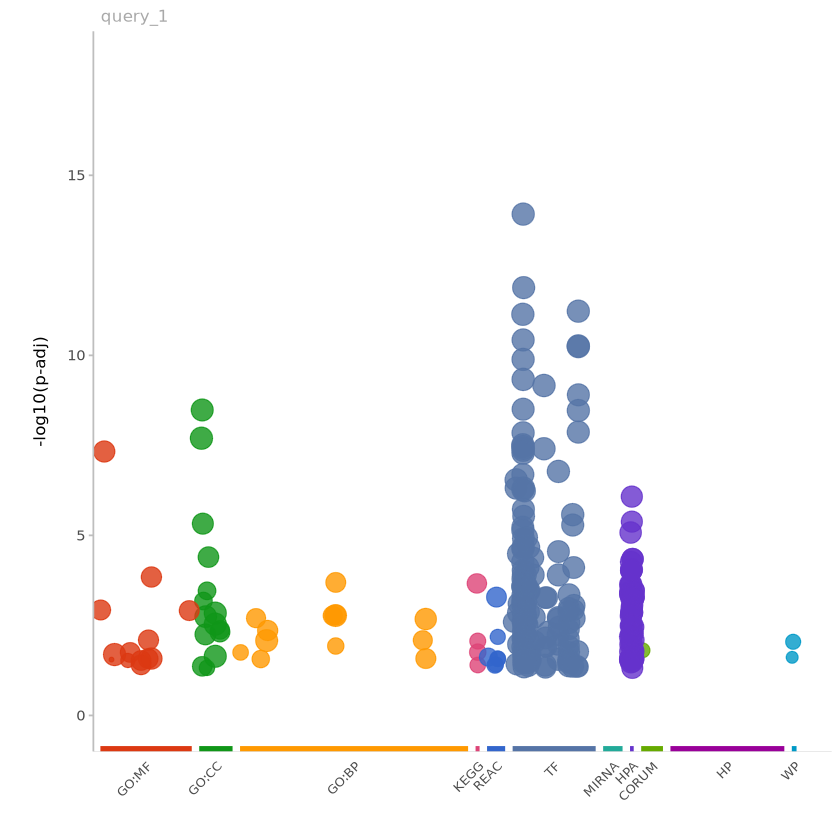

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "allDEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("allDEGs_manhattan", p, 9, 5)

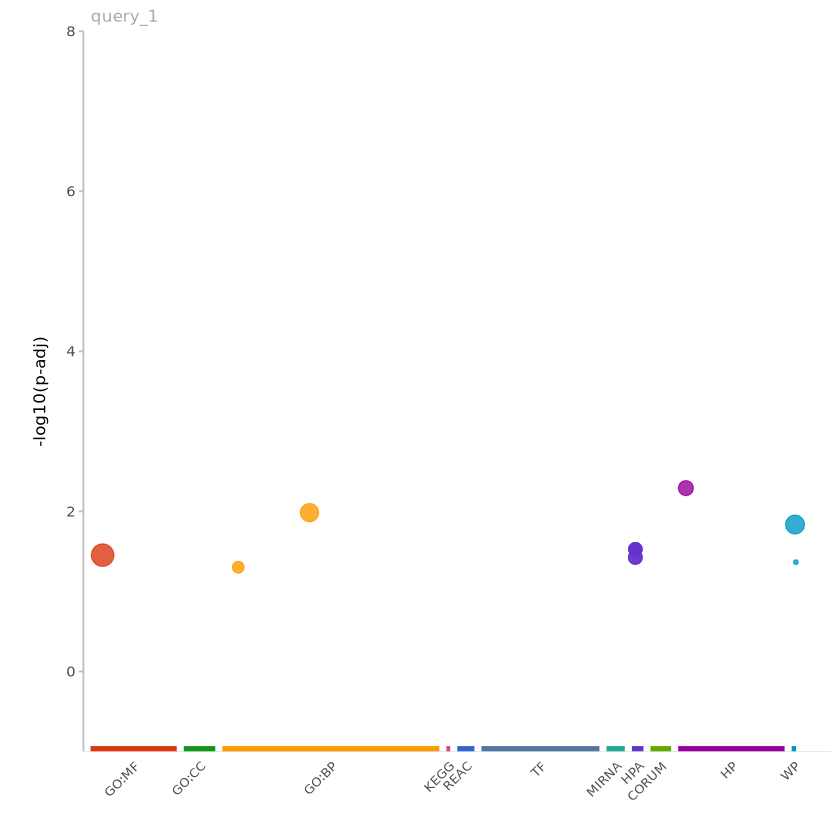

In [20]:
deg_male = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_male$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "ea_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("ea_bias_DEGs_manhattan", p, 9, 5)

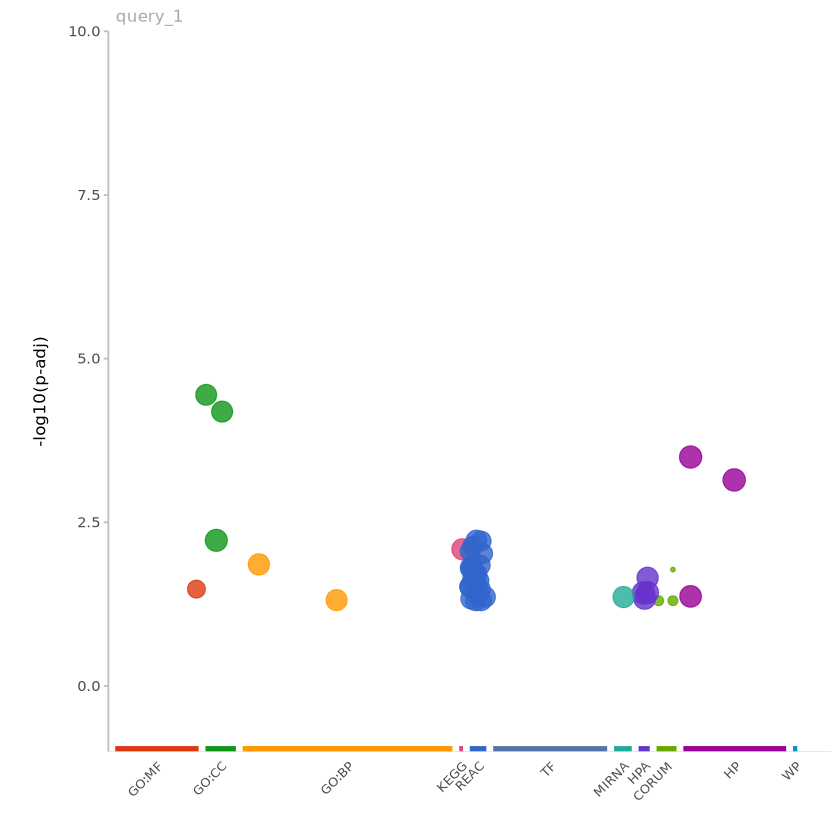

In [22]:
deg_female = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_female$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "aa_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("aa_bias_DEGs_manhattan", p, 9, 5)